In [7]:
%load_ext pymatbridge
%matplotlib inline

The pymatbridge extension is already loaded. To reload it, use:
  %reload_ext pymatbridge


## Question (10)

We don't need CVX for this.

The problem is to solve the following ODEs
\begin{equation}
F_1 = 
    \begin{cases}
        x'(t) &= -y(t)\\
        y'(t) &= x(t)
    \end{cases}
\end{equation}
where the solution is obviously $x(t) = cos(t), y(t) = sin(t)$, and the other slightly modified ODE:
\begin{align}
F_2 &= 
    \begin{cases}
        x'(t) &= \frac{-y(t)}{r(t)}\\
        y'(t) &= \frac{x(t)}{r(t)}\\
    \end{cases} \\
\text{where} ~~~r(t) &= \sqrt{x(t)^2 + y(t)^2}
\end{align}
the solution is the same as above since $cos(t)^2 + sin(t)^2 = 1$.

The goal is to compare the accuracy of three different ODE solving schemes. It should be noted that Python's built-in solver was used to solve the non-linear equations for the Backward Euler and Crank-Nicolson.

Finally, we let $x(0) = 1, y(0) = 0$

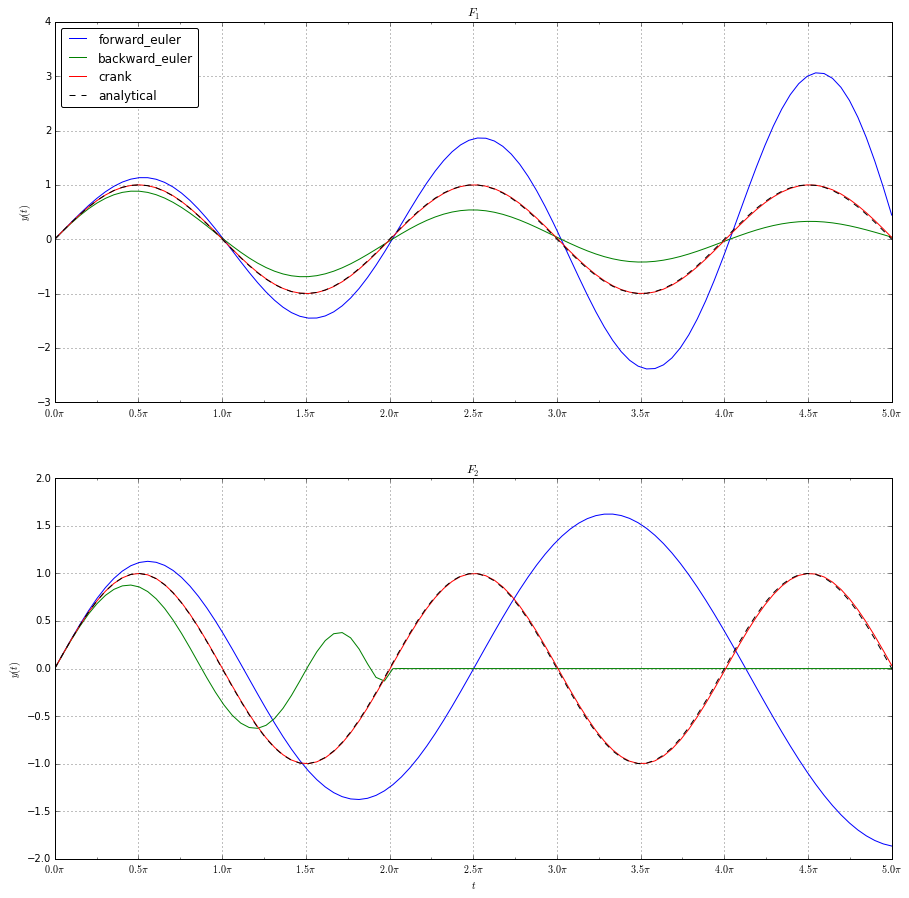

In [9]:
%run q10.py

It is interesting to note that the Forward Euler scheme blows up in both cases, i.e. the amplitude is constantly increasing. On the other hand, the Backward Euler is rather dissipative, so much so that $x(t) = 0$ for $t \ge 2\pi$ when solving $F_2$! The Crank-Nicolson scheme comes as a clear winner here. 

Moreover, the frequency of the wave is more or less correct for all schemes when solving $F_1$. This is not the case for $F_2$, where all three solutions have completely different frequencies. 

## Question (11)

Let $V(u)_p$ be the best fit polynomial for the data in a norm $p$. Then, we define the residual $r_p$ to be the error between the data and the polynomial: 
$$
r_p = [V(u_i)_p - v_i], ~~i = 1~..~m
$$
such that the goal of CVX is to minimize $r_p$ for a given $p$. 

We then need compare the obtained best fit polynomials by evaluating their residual in the $\infty$ norm and normalizing:
$$
\hat{r_p} = \frac{||r_p||_\infty}{||r_\infty||_\infty}
$$
A graph of $r_p$ versus $p$ is shown below. 

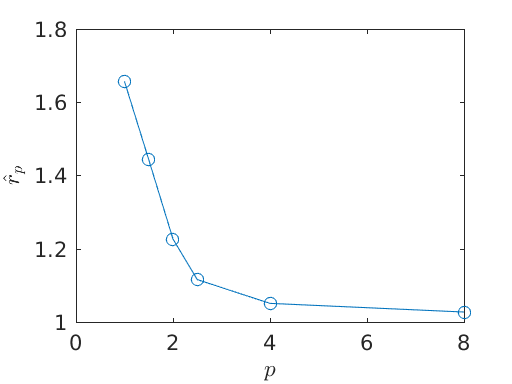

In [3]:
%%matlab
run q11.m

Evidently, a higher $p$ leads to a better fit polynomial in the $\infty$ norm.

## Question (12)

The best x according to CVX are:
   1.0e-08 *

    0.1366    0.0002



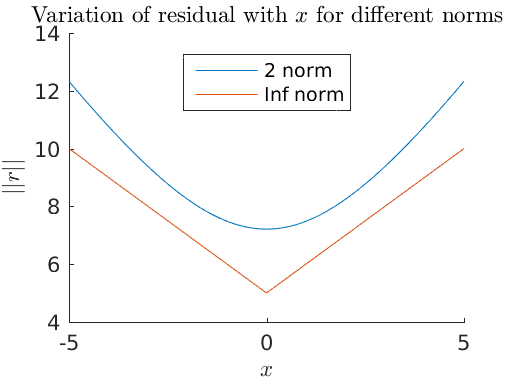

In [4]:
%%matlab
run q12.m

The results between the graph and the CVX optimization agree -- $10^{-8}$ is pretty much $0$.

## Question (13)

Let $X = \big\{(x_1, y_1), \dots, (x_n, y_n)\big\}$, then the goal is to find the point $a = (x, y)$ that minimizes $\big|\big|r\big|\big|_p$, where $r = [r_1, \dots, r_n]$ and $r_i = \big|\big|a - (x_i, y_i)\big|\big|_2$ for some norm $p$.

The chosen $X$ are quite simple, but I find the trend is interesting. We start with an acute triangle and incrementally move the tip away. The second triangle is equilateral. 

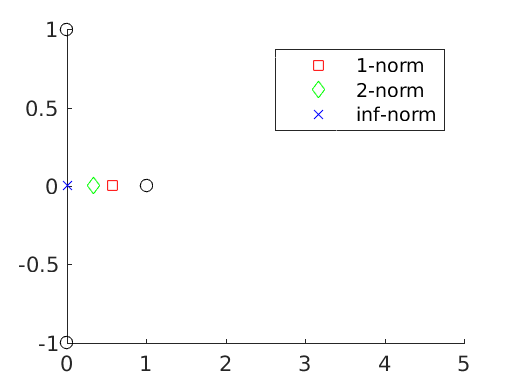

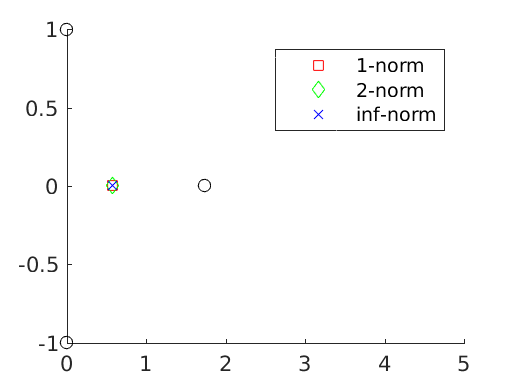

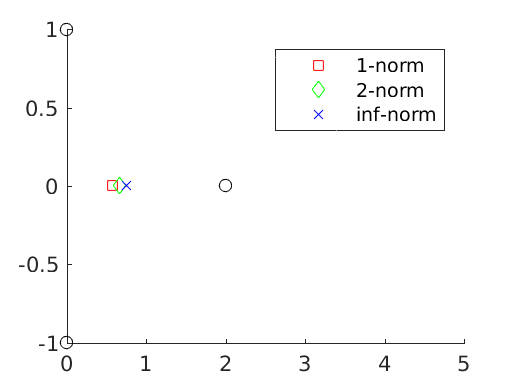

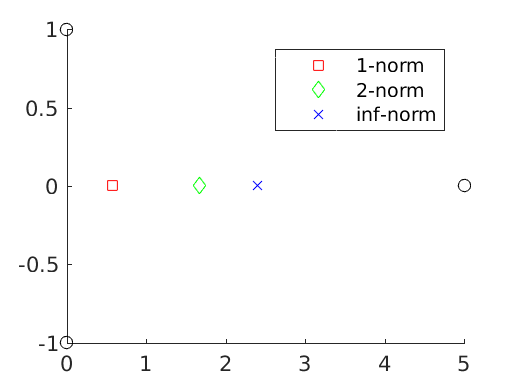

In [5]:
%%matlab
run q13.m

## Question (14)

We seek a linear function $p(x) = c^T x - b$ which classifies points $U = \{u_1, \dots, u_n\}$ and $V = \{v_1, \dots, v_m\}$ with maximum gap in between the two sets of points.

This can be done by solving the following problem in CVX (from Boyd equation **(8.23)**):
\begin{align}
\text{maximize}\quad &t&\\
\text{such that}\quad &c^Tu_i - b \ge t ~&i = 1 : n\\
                 &c^Tv_j - b \le -t ~&j = 1 : m\\
                 &\big|\big|c\big|\big|_2 \le 1\\
\end{align}


t =

    0.0046


c =

    0.6858
   -0.7278


b =

   -0.1031



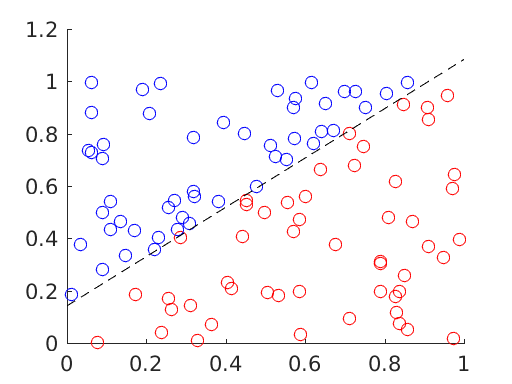

In [6]:
%%matlab
run q14.m